images/supreme_court/down/1722413758.png


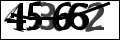

images/supreme_court/down/1722413759.png


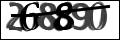

images/supreme_court/down/1722413760.png


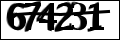

images/supreme_court/down/1722413761.png


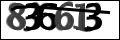

In [9]:
import time, glob, os
import requests
from io import BytesIO

def imageLoadFromUrl(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

def toTrainImage(img):
    # img = img.crop((1, 1, img.width -1, img.height -1))
    fill_color = (255,255,255)
    bg_white = Image.new("RGBA", img.size, fill_color)
    bg_white.paste(img, (0, 0), img)
    bg_white = bg_white.convert("L")
    return bg_white

def getData():
    url = "https://safind.scourt.go.kr/sf/captchaImg?t=image"
    img = imageLoadFromUrl(url)
    time_stamp = int(time.time())
    save_path = f"images/supreme_court/down/{time_stamp}.png"
    img = toTrainImage(img)
    img.save(save_path)
    return save_path

for i in range(4):
    save_path = getData()
    
    with Image.open(save_path) as img:
        img.save(save_path)
    
    print(save_path)
    display(img)
    time.sleep(1)



In [ ]:
from PIL import Image, ImageOps
import requests
from io import BytesIO
import time, glob, os
from hyper import Hyper, CaptchaType



imgDir = os.path.join("images", "gov24")
predDir = os.path.join(imgDir, "pred")
trainDir = os.path.join(imgDir, "train")

loadDir = trainDir
saveDir = os.path.join(loadDir, "cropped")

images = glob.glob(loadDir + os.sep + "*.png")

for img in images:
    image = Image.open(img)
    image = image.crop((1, 1, image.width, image.height))
    display(image)
    image.save(os.path.join(saveDir, img.split(os.sep)[-1]))


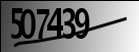

In [15]:
from PIL import Image, ImageOps
import requests
from io import BytesIO
import time, glob, os
from hyper import Hyper, CaptchaType



def toTrainImage(img):
    img = img.crop((1, 1, img.width -1, img.height -1))
    fill_color = (255,255,255)
    bg_white = Image.new("RGBA", img.size, fill_color)
    bg_white.paste(img, (0, 0), img)
    bg_white = bg_white.convert("L")
    return bg_white



def getGov24Data(loop=1, delay=1.0):
    url = "https://www.gov.kr/nlogin/captcha"

    for i in range(loop):
        img = imageLoadFromUrl(url)
        # img = toTrainImage(img)
        time_stamp = int(time.time())
        save_path = f"images/gov24/down/{time_stamp}.png"
        img.save(save_path)
        # pred = hyper.predict(img)
        img.close()
        img = None
        time.sleep(delay)
        # return save_path

baseDir = ""
imgDir = os.path.join(baseDir, "images", "gov24", "down")
saveDir = os.path.join(baseDir, "images", "gov24", "proc")
images = glob.glob(imgDir + os.sep + "*.png")
hyper = Hyper(captcha_type=CaptchaType.GOV24, weights_only=True, quiet_out=True)

# for i in range(100):
#     img_path = getData()
#     img = Image.open(img_path)
#     pred = hyper.predict(img_path)
#     img.save(os.path.join(saveDir, pred + ".png"))  
#     img.close()
#     img = None
#     i += 1
#     print(f"Process {i}")

i = 0

for img_path in images:
    img = Image.open(img_path)
    img = img.resize((138, 51))
    img = ImageOps.expand(img, border=1, fill='black')
    img = img.crop((0, 0, 139, 52))
    # bg_black = Image.new(img.mode, (139, 52), (0,0,0))
    # bg_black.paste(img, (0, 0), img)
    display(img)
    print(img.size)
    
    pred = hyper.predict(img_path)
    img.save(os.path.join(saveDir, pred + ".png"))  
    img.close()
    img = None
    i += 1
    print(f"Process {i}")
    break

# getGov24Data(400)
    